In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, f1_score, recall_score, precision_score, accuracy_score, auc, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV
import seaborn as sn

In [2]:
import sys
sys.path.insert(1,"../")
from scripts import neuralnetwork as nn
nn.load_data_normalized(nn.PATH_TO_FASHION_TRAIN)

X_train, y_train, y_t = nn.load_data_normalized(nn.PATH_TO_FASHION_TRAIN)
X_test, y_test, y = nn.load_data_normalized(nn.PATH_TO_FASHION_TEST)


pca = PCA(n_components = 0.9)
X_train_reduced = pca.fit_transform(X_train)

X_test_reduced = pca.transform(X_test)

X_train_reduced.shape

(10000, 62)

In [3]:
parameters = {'kernel':('linear','poly', 'rbf'), 'C':[1, 5, 10]}
svc = SVC()
clf = GridSearchCV(svc, parameters)

In [4]:
y_t = y_t.reshape(1,-1)[0]
clf.fit(X_train_reduced, y_t)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 5, 10], 'kernel': ('linear', 'poly', 'rbf')})

In [5]:
print(clf.best_params_)
best_score = clf.best_score_
params = clf.best_params_
params["C"]

{'C': 5, 'kernel': 'rbf'}


5

In [6]:
# inititalize svm
clf = SVC(C=params["C"], kernel=params["kernel"])
y_t = y_t.reshape(1,-1)[0]
# trian the model 
clf.fit(X_train_reduced, y_t)
# predict 
pred = clf.predict(X_train_reduced)
train_accuracy = accuracy_score(y_t, pred)

print(f'train accuracy: {train_accuracy}') 

train accuracy: 0.9496


In [7]:
pred_test = clf.predict(X_test_reduced)
test_accuracy = accuracy_score(y, pred_test)
print(f'test accuracy: {test_accuracy}') 


test accuracy: 0.8642


In [8]:
labels = np.unique(y)
y_bin = label_binarize(y, classes=labels)
pred_bin = label_binarize(pred_test, classes=labels)

In [9]:
roc_auc_score(y_true=y_bin, y_score=pred_bin, multi_class="ovo")

0.915125

In [10]:

f1 = f1_score(y_true=y_bin, y_pred=pred_bin, average="macro")
f1


0.8639671409454983

In [11]:
confusion_matrix_ = confusion_matrix(y_true=y, y_pred=pred_test)

Text(0.5, 15.049999999999999, 'predicted labels')

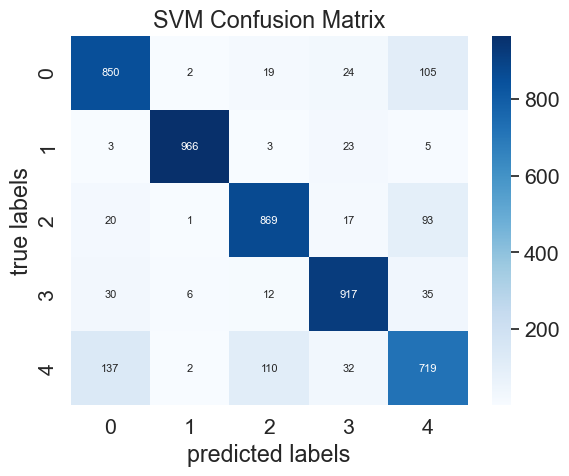

In [12]:
sn.set(font_scale=1.4)
sn.heatmap(confusion_matrix_, cmap="Blues", annot=True, annot_kws={"size":8}, fmt="g" )
plt.title("SVM Confusion Matrix")
plt.ylabel("true labels")
plt.xlabel("predicted labels")

In [13]:
f3 = precision_score(y_true=y_bin, y_pred=pred_bin, average="macro")
f3

0.8640869723865141

In [14]:
f2 = recall_score(y_true=y_bin, y_pred=pred_bin, average="macro")
f2

0.8642